In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss, jaccard_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
#import dataset
df = pd.read_csv("/kaggle/input/water-potability/water_potability.csv")

In [3]:
df #melihat df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
df.isna().sum() #melihat banyaknya datapoint yang kosong

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# Imputasi dengan KNN

In [6]:
knn_imputer = KNNImputer(n_neighbors=3) #membuat model

In [7]:
df_fill_knn = df.copy() #membuat df copy

In [8]:
df_fill_knn.select_dtypes(include='number') #seleksi atribut numerik

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [9]:
df_fill_knn.select_dtypes(include='number').columns #melihat nama-nama kolom yang ada

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [10]:
num_col = df_fill_knn.select_dtypes(include='number').columns #membuat variabel berisi kolom-kolom

In [11]:
df_fill_knn[num_col] = knn_imputer.fit_transform(df_fill_knn[num_col]) #mengisi datapoint yang kosong

In [12]:
df_fill_knn.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [13]:
df_fill_knn

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.655223,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,351.285226,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,347.323743,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,368.086095,392.449580,19.903225,56.689055,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,316.571962,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,334.293598,402.883113,11.168946,77.488213,4.708658,1.0


In [14]:
df_fin = df_fill_knn

# Model Regresi Logistik

In [15]:
logreg1 = LogisticRegression() #membuat model

In [16]:
Xrl = df_fin.drop(columns=["Potability"], axis=1) #menentukan variabel independent dan dependent
yrl = df_fin[["Potability"]]

In [17]:
Xrl_train, Xrl_test, yrl_train, yrl_test = train_test_split(Xrl, yrl, test_size=0.2, random_state=42) #men-split data

In [18]:
logreg1.fit(Xrl_train, yrl_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [19]:
yrl_pred = logreg1.predict(Xrl_test) #menguji model

In [20]:
yrl_pred #menampilkan hasil

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
yrl_test

,Potability
2947,0.0
2782,1.0
1644,0.0
70,0.0
2045,1.0
...,...
208,0.0
1578,1.0
565,0.0
313,1.0


melihat akurasi model

In [22]:
confusion_matrix(yrl_test, yrl_pred)

array([[412,   0],
       [244,   0]])

In [23]:
log_loss(yrl_test, yrl_pred)

13.406480833756987

In [24]:
jaccard_rl = jaccard_score(yrl_test, yrl_pred, average = 'macro')
print(jaccard_rl)

0.31402439024390244


# Model Decision Tree

In [25]:
Xdt = df_fin.drop(columns=["Potability"], axis=1) #menentukan variabel independent dan dependent
ydt = df_fin[["Potability"]]

In [26]:
Xdt_train, Xdt_test, ydt_train, ydt_test = train_test_split(Xdt, ydt, test_size = 0.3, random_state = 42) #men-split data

In [27]:
#membuat model
drugtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

In [28]:
drugtree.fit(Xdt_train, ydt_train) #melakukan training

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [29]:
predTree = drugtree.predict(Xdt_test) #menggunakan model untuk prediksi
predTree

array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# Akurasi

In [30]:
#melihat akurasi model
print("Accuracy : ", accuracy_score(ydt_test, predTree))

Accuracy :  0.6317395727365208


In [31]:
jaccard_dt = jaccard_score(ydt_test, predTree, average='macro')
print(jaccard_dt)

0.3413284632034632


# Membuat visualisasi dari Decision Tree

In [32]:
from sklearn import tree

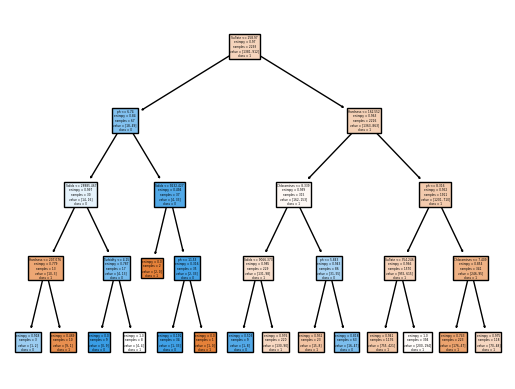

In [33]:
featureNames = df_fin.columns[0:9]
graph = tree.plot_tree(drugtree,
                       feature_names=featureNames,
                       class_names=["1", "0"],
                       filled=True)

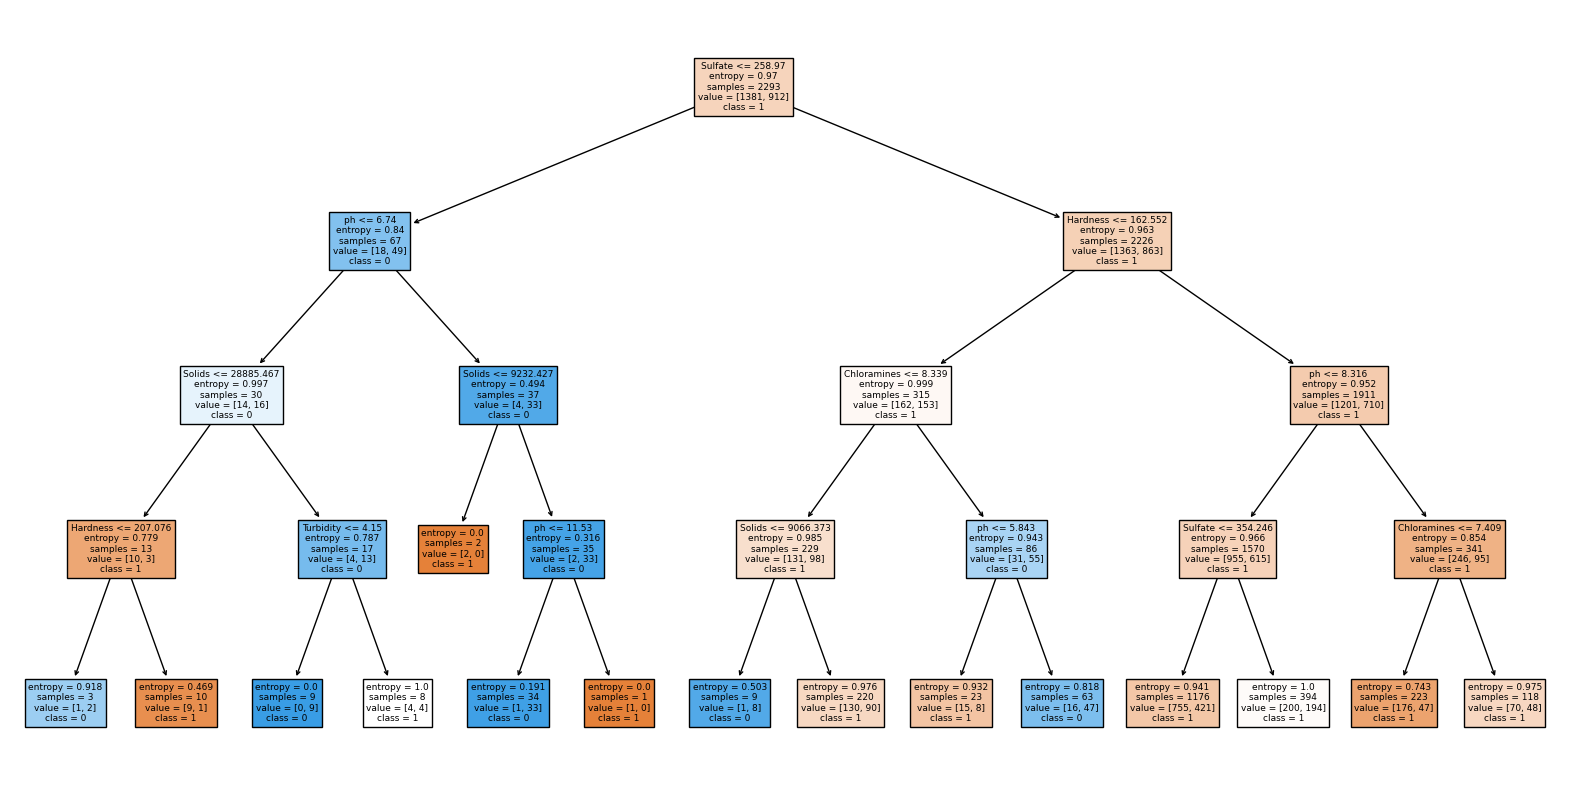

In [34]:
import matplotlib.pyplot as plt
from sklearn import tree

# Menentukan nama fitur
featureNames = df_fin.columns[0:9]

# Memplot pohon keputusan
plt.figure(figsize=(20,10))  # Atur ukuran gambar
graph = tree.plot_tree(drugtree,
                       feature_names=featureNames,
                       class_names=["1", "0"],
                       filled=True)

# Menyimpan plot ke dalam file PNG
plt.savefig('decision_tree.png')

# Menampilkan plot
plt.show()

# SVM

In [35]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   float64
dtypes: float64(10)
memory usage: 256.1 KB


In [36]:
#set X
feature_df = df_fin[['ph', 'Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']].values
Xs = np.asarray(feature_df)
Xs[0:5]

array([[6.65522342e+00, 2.04890455e+02, 2.07913190e+04, 7.30021187e+00,
        3.68516441e+02, 5.64308654e+02, 1.03797831e+01, 8.69909705e+01,
        2.96313538e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, 6.63524588e+00,
        3.51285226e+02, 5.92885359e+02, 1.51800131e+01, 5.63290763e+01,
        4.50065627e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, 9.27588360e+00,
        3.47323743e+02, 4.18606213e+02, 1.68686369e+01, 6.64200925e+01,
        3.05593375e+00],
       [8.31676588e+00, 2.14373394e+02, 2.20184174e+04, 8.05933238e+00,
        3.56886136e+02, 3.63266516e+02, 1.84365245e+01, 1.00341674e+02,
        4.62877054e+00],
       [9.09222346e+00, 1.81101509e+02, 1.79789863e+04, 6.54659997e+00,
        3.10135738e+02, 3.98410813e+02, 1.15582794e+01, 3.19979927e+01,
        4.07507543e+00]])

In [37]:
#set Y
df_fin['Potability'] = df_fin['Potability'].astype('int')
ys=np.asarray(df_fin['Potability'])
ys[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
#train-test split
train_xs,test_xs,train_ys,test_ys=train_test_split(Xs,ys, test_size=0.2,random_state=4)
print('Train set:', train_xs.shape,train_ys.shape)
print('Train set:', test_xs.shape,test_ys.shape)

Train set: (2620, 9) (2620,)
Train set: (656, 9) (656,)


# Membuat Model

In [39]:
#membuat model
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(train_xs,train_ys)

SVC()

In [40]:
#Prediksi
yhat = clf.predict(test_xs)
yhat[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Evaluasi

In [41]:
#jaccard score
from sklearn.metrics import jaccard_score
jaccard_svm = jaccard_score(test_ys,yhat, average = 'macro')
print(jaccard_svm)

0.31097560975609756


In [42]:
#f1-score
from sklearn.metrics import f1_score
f1_score(test_ys,yhat,pos_label=0)

0.7669172932330827

In [43]:
#visualisasi confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
 
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
print(confusion_matrix(test_ys, yhat, labels=[0,1]))

[[408   0]
 [248   0]]


Confusion matrix, without normalization
[[408   0]
 [248   0]]


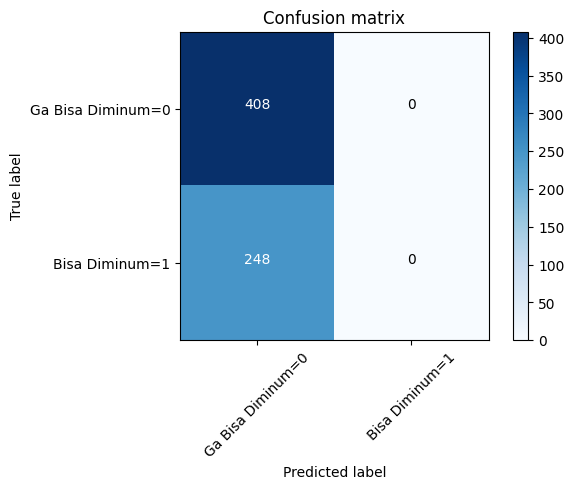

In [44]:
#confusion matrix
cnf_matrix =confusion_matrix(test_ys, yhat, labels=[0,1])
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['Ga Bisa Diminum=0', 'Bisa Diminum=1'],normalize = False, title='Confusion matrix')

# KNN

In [45]:
#melihat 4 row pertama
Xn = df_fin.drop(columns="Potability")
Xn.head(4)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.655223,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,351.285226,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,347.323743,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771


In [46]:
yn = df_fin["Potability"]
yn.head(4)

0    0
1    0
2    0
3    0
Name: Potability, dtype: int64

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
#normalize data
Xn_minmax = MinMaxScaler(feature_range=(0, 1))
Xn_minmax.fit(Xn)
Xn_sc = Xn_minmax.transform(Xn.astype(float))

In [49]:
Xn_sc[0:4]

array([[0.4753731 , 0.57113901, 0.33609646, 0.54389134, 0.68038521,
        0.66943948, 0.31340165, 0.69975313, 0.28609102],
       [0.26543429, 0.29740043, 0.30061142, 0.49183921, 0.63143715,
        0.71941108, 0.49731851, 0.4509993 , 0.57679264],
       [0.57850887, 0.64131081, 0.32161885, 0.69854275, 0.62018392,
        0.41465206, 0.56201674, 0.5328657 , 0.30363656],
       [0.59405471, 0.60553587, 0.35624379, 0.60331369, 0.64734744,
        0.31788047, 0.62208906, 0.80806473, 0.60101542]])

# Test Train Split

In [50]:
#train test split
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size = 0.2, random_state = 42)

# Membuat Model

In [51]:
#membuat model dengan k = 2
k = 2
tele_KNN = KNeighborsClassifier(n_neighbors = k)
tele_KNN.fit(Xn_train, yn_train)

KNeighborsClassifier(n_neighbors=2)

# Prediksi

In [52]:
#hasil prediksi
yn_pred = tele_KNN.predict(Xn_test)
yn_pred[0:5]

array([0, 0, 0, 0, 0])

In [53]:
#kelas sebenarnya
yn_test[0:5]

2947    0
2782    1
1644    0
70      0
2045    1
Name: Potability, dtype: int64

# Evaluasi Model

In [54]:
#menghitung akurasi
knn_score = metrics.accuracy_score(yn_test, yn_pred)

In [55]:
print(knn_score)

0.5884146341463414


In [56]:
jaccard_knn = jaccard_score(yn_test, yn_pred, average='macro')
print(jaccard_knn)

0.33201171290557


# Mencari K Terbaik

In [57]:
#mencari k terbaik diantara 1<=k<=10
nk = 10

mean_acc= np.zeros((nk))
std_acc = np.zeros((nk))

for n in range(1,nk+1):
 neighbor_k = KNeighborsClassifier(n_neighbors= n).fit(Xn_train,yn_train)
 ypredict = neighbor_k.predict(Xn_test)
 mean_acc[n-1] = metrics.accuracy_score(yn_test, ypredict)
 std_acc[n-1]= np.std(ypredict==yn_test)/np.sqrt(ypredict.shape[0])

mean_acc

array([0.51981707, 0.58841463, 0.54268293, 0.55945122, 0.52591463,
       0.56097561, 0.5472561 , 0.57012195, 0.54573171, 0.57621951])

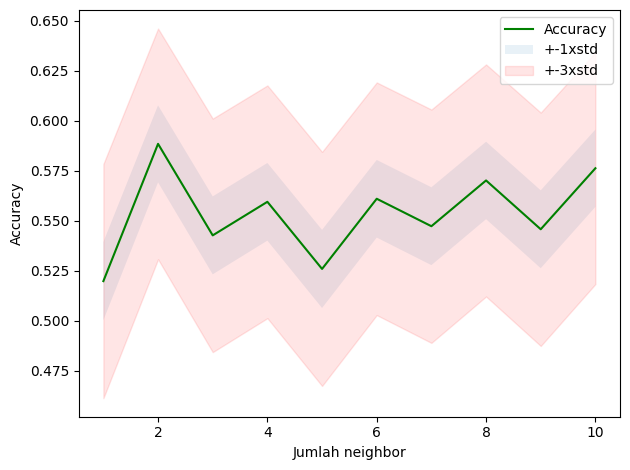

In [58]:
#plot akurasi dari beberapa k
plt.plot(range(1,nk+1),mean_acc,'g')
plt.fill_between(range(1,nk+1),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha = 0.10)
plt.fill_between(range(1,nk+1),mean_acc-3*std_acc,mean_acc+3*std_acc,alpha = 0.10, color = "red")
plt.legend(('Accuracy', '+-1xstd', '+-3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Jumlah neighbor')
plt.tight_layout()
plt.show()

In [59]:
#k terbaik beserta hasilnya
print("akurasi terbaik model adalah", mean_acc.max(), "dengan jumlah k=", mean_acc.argmax()+1)

akurasi terbaik model adalah 0.5884146341463414 dengan jumlah k= 2


# Perbandingan Keempat Model

Akan dibandingkan semua metode di atas dilihat dari score pada Jaccard-Score

In [60]:
print("Jaccard Score dari metode Regresi Logistik: ", jaccard_rl)
print("Jaccard Score dari metode Decision Tree : ", jaccard_dt)
print("Jaccard Score dari metode SVM: ", jaccard_svm)
print("Jaccard Score dari metode KNN: ", jaccard_knn)

Jaccard Score dari metode Regresi Logistik:  0.31402439024390244
Jaccard Score dari metode Decision Tree :  0.3413284632034632
Jaccard Score dari metode SVM:  0.31097560975609756
Jaccard Score dari metode KNN:  0.33201171290557


Dari perbandingan di atas, didapat bahwa metode Decision Tree cenderung lebih baik untuk masalah klasifikasi kita.